# Bank Customer Churn Model

***

## Objective
We aim to find the customer are more likely churn or unsubscribe the service provided by the bank. It is importent to predict the churn customer as it determines the success or the failure of any business. We are aiming to make a Customer churn model by using three different algorithms (that is, Logistic Regression, Support Vector Machine Classifier, and Random Forest Classifier). We also compared the accuracy of each model, and to maximize the accuracy / performance of every model we used Hyper Parameter Tuning. By creating this model for the bank, they can improve customer experience, optimize their services for their customer,and increase the profits.

## Data Source 
The dataset we used is available on GitHub (link: 'https://github.com/YBI-Foundation/Dataset/blob/main/Bank%20Churn%20Modelling.csv'). 
For in-depth information about the available libraries, modules and functions, we used Pandas, Numpy, Matplotlib and Seaborn official website where they have provided free information about all libraries that can be used to bring the desirable outcome for our Machine Learning Model.

## Import Library 

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Import Data

In [48]:
bcm=pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')

## Describe Data 

In [4]:
bcm.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
bcm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [6]:
bcm.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
bcm.shape

(10000, 13)

In [8]:
bcm.duplicated('CustomerId').sum()

0

In [81]:
bcm=bcm.set_index('CustomerId')

In [10]:
bcm.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn'],
      dtype='object')

In [11]:
bcm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


## Data Visualization 

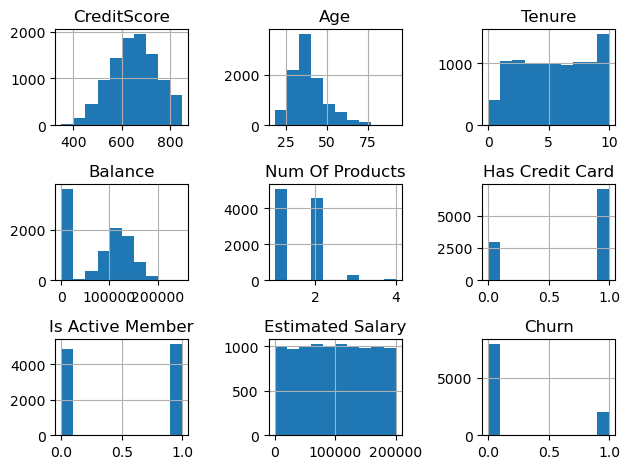

In [12]:
bcm.hist()
plt.tight_layout()
plt.show()

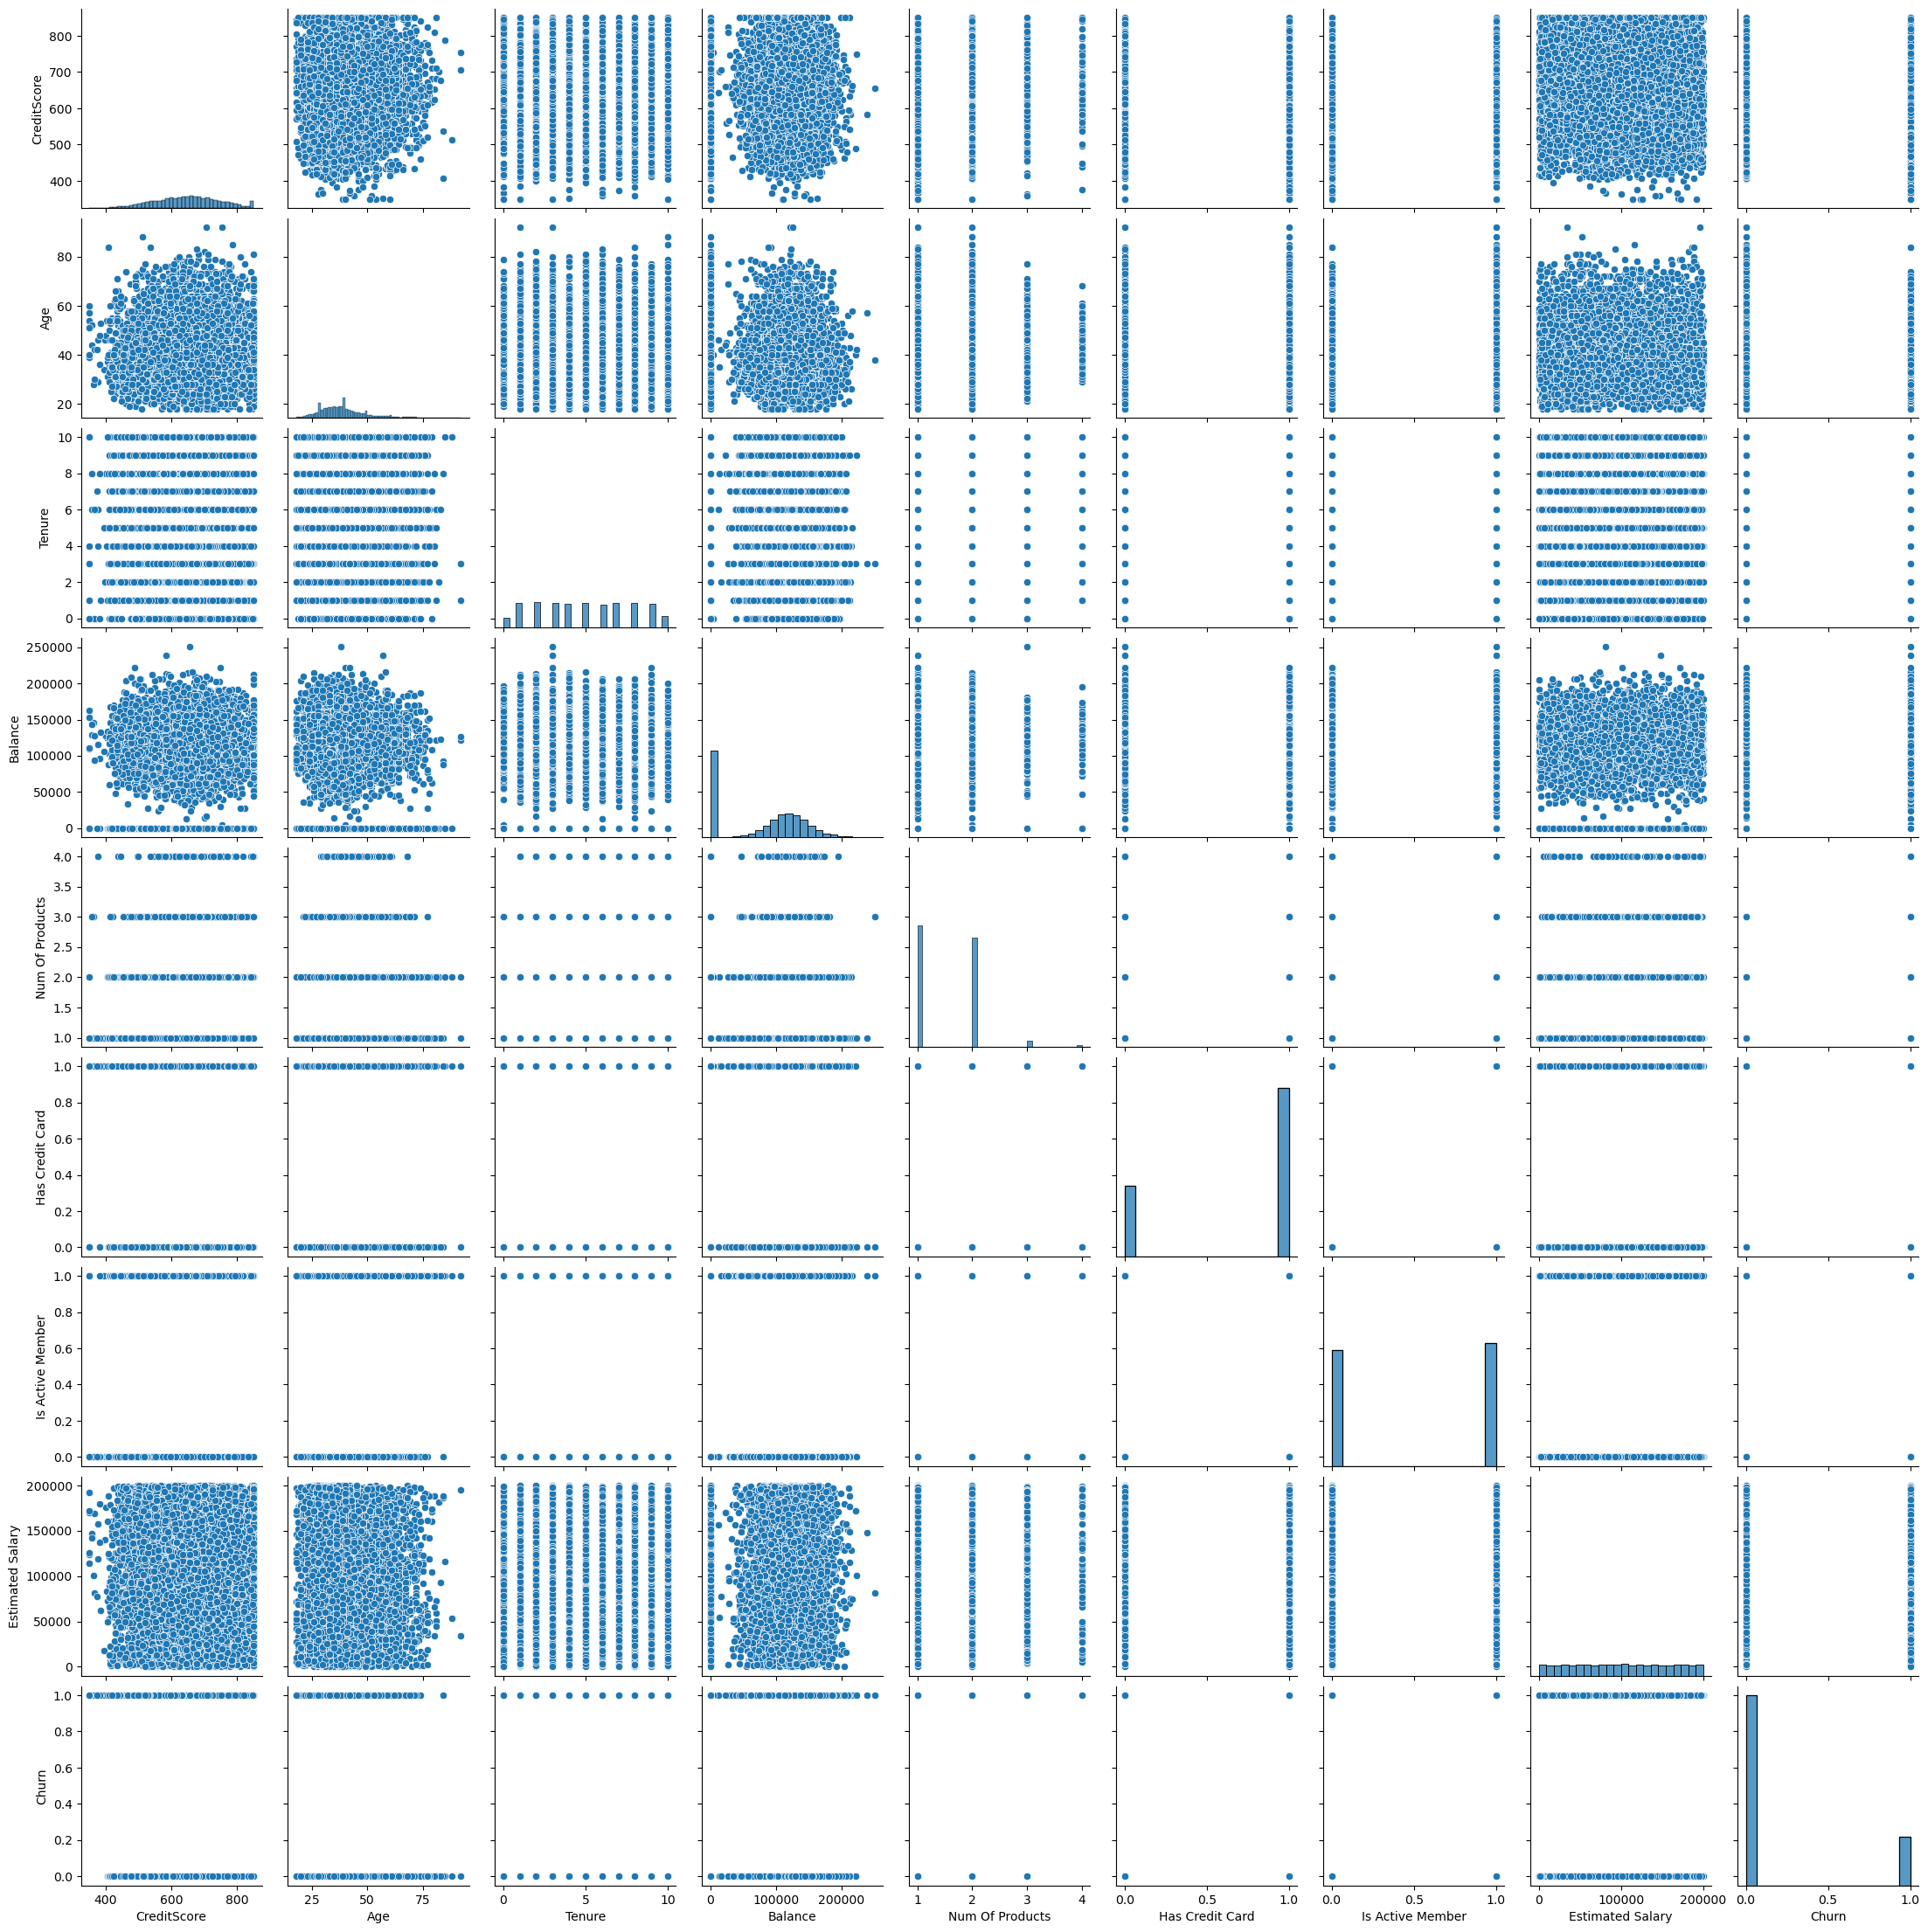

In [13]:
sns.pairplot(bcm)

In [82]:
bcm.corr().style.background_gradient(cmap='coolwarm')

,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
Num Of Products,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
Has Credit Card,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
Is Active Member,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
Estimated Salary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Churn,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


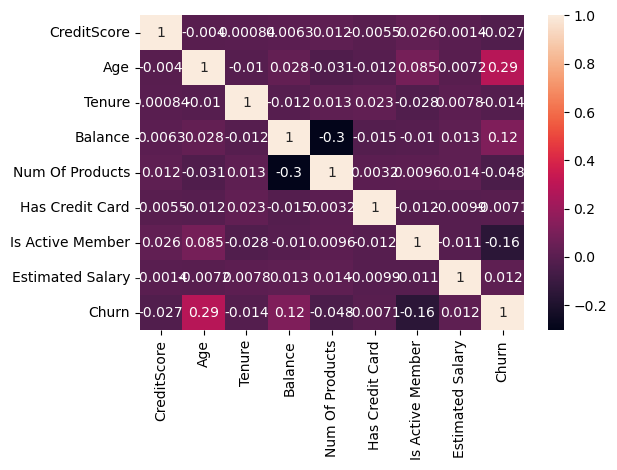

In [15]:
sns.heatmap(bcm.corr(),annot=True)
plt.tight_layout()
plt.show()

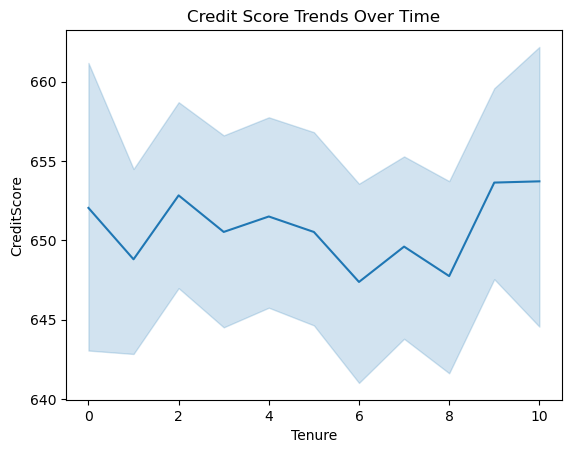

In [55]:
sns.lineplot(x='Tenure', y='CreditScore', data=bcm)
plt.title('Credit Score Trends Over Time')
plt.show()

## Endcoding data 

In [48]:
bcm['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [7]:
bcm.replace({'Geography':{'France':2,'Germany':1,'Spain':0}},inplace=True)

In [50]:
bcm['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [8]:
bcm.replace({'Gender':{'Female':1,'Male':0}},inplace=True)

In [52]:
bcm['Num Of Products'].value_counts()

1    5084
2    4590
3     266
4      60
Name: Num Of Products, dtype: int64

In [9]:
bcm.replace({'Num Of Products':{'1':0,'2':1,'3':1,'4':1}},inplace=True)

In [36]:
bcm['Has Credit Card'].value_counts()

1    7055
0    2945
Name: Has Credit Card, dtype: int64

In [37]:
bcm['Is Active Member'].value_counts()

1    5151
0    4849
Name: Is Active Member, dtype: int64

In [38]:
bcm.loc[(bcm['Balance']==0,'Churn')].value_counts()

0    3117
1     500
Name: Churn, dtype: int64

In [10]:
bcm['Zero Balance']=np.where(bcm['Balance']>0,1,0)

<AxesSubplot:>

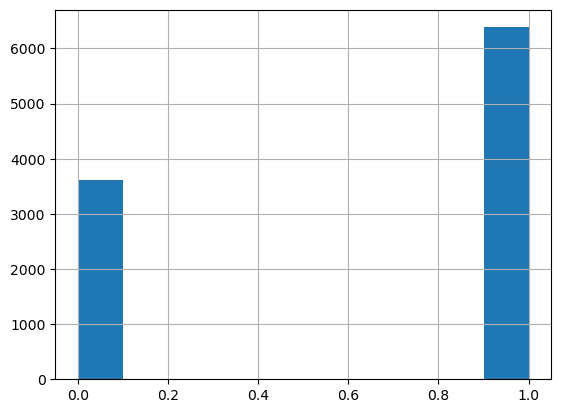

In [40]:
bcm['Zero Balance'].hist()

In [27]:
bcm.groupby(['Churn','Has Credit Card']).count()

Surname  CreditScore  Geography  Gender   Age  Tenure  \
Churn Has Credit Card                                                          
0     0                   2332         2332       2332    2332  2332    2332   
      1                   5631         5631       5631    5631  5631    5631   
1     0                    613          613        613     613   613     613   
      1                   1424         1424       1424    1424  1424    1424   

                       Balance  Num Of Products  Is Active Member  \
Churn Has Credit Card                                               
0     0                   2332             2332              2332   
      1                   5631             5631              5631   
1     0                    613              613               613   
      1                   1424             1424              1424   

                       Estimated Salary  Zero Balance  
Churn Has Credit Card                                  
0     0                            2332          2332  
      1                            5631          5631  
1     0                             613           613  
      1                            1424          1424

In [28]:
bcm.groupby(['Churn','Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     France        4204         4204    4204  4204    4204     4204   
      Germany       1695         1695    1695  1695    1695     1695   
      Spain         2064         2064    2064  2064    2064     2064   
1     France         810          810     810   810     810      810   
      Germany        814          814     814   814     814      814   
      Spain          413          413     413   413     413      413   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     France                4204             4204              4204   
      Germany               1695             1695              1695   
      Spain                 2064             2064              2064   
1     France                 810              810               810   
      Germany                814              814               814   
      Spain                  413              413               413   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     France                 4204          4204  
      Germany                1695          1695  
      Spain                  2064          2064  
1     France                  810           810  
      Germany                 814           814  
      Spain                   413           413

## Define Target Variable (y) and Feature Variables (x)

In [29]:
bcm.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [11]:
y=bcm['Churn']
x=bcm.drop(['Surname','Churn'],axis=1)

In [61]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Zero Balance
CustomerId,,,,,,,,,,,
15634602,619,2,1,42,2,0.00,1,1,1,101348.88,0
15647311,608,0,1,41,1,83807.86,1,0,1,112542.58,1
15619304,502,2,1,42,8,159660.80,3,1,0,113931.57,1
15701354,699,2,1,39,1,0.00,2,0,0,93826.63,0
15737888,850,0,1,43,2,125510.82,1,1,1,79084.10,1
...,...,...,...,...,...,...,...,...,...,...,...
15606229,771,2,0,39,5,0.00,2,1,0,96270.64,0
15569892,516,2,0,35,10,57369.61,1,1,1,101699.77,1
15584532,709,2,1,36,7,0.00,1,0,1,42085.58,0


In [31]:
y.shape,x.shape

((10000,), (10000, 11))

## Data Preprocessing 
Handling imbalance data
UnderSampling & OverSampling

In [32]:
bcm['Churn'].value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

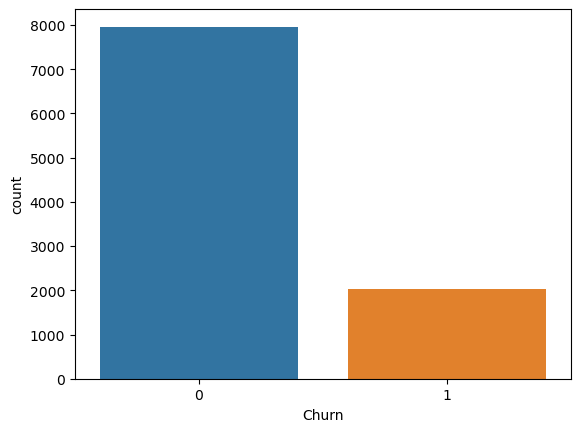

In [33]:
sns.countplot(x='Churn',data=bcm)

### UnderSampling

In [12]:
!pip install imblearn

In [13]:
from imblearn.under_sampling import RandomUnderSampler

In [14]:
rus=RandomUnderSampler(random_state=2529)

In [15]:
x_rus,y_rus=rus.fit_resample(x,y)

In [108]:
x_rus

,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Zero Balance
CustomerId,,,,,,,,,,,
15696361,648,1,0,31,7,125681.51,1,0,1,129980.93,1
15793196,759,2,0,41,9,0.00,2,0,1,190294.12,0
15703778,728,2,0,33,8,129907.63,1,0,1,36083.96,1
15724838,599,2,1,43,4,0.00,1,1,0,170347.10,0
15624528,664,1,0,26,7,116244.14,2,1,1,95145.14,1
...,...,...,...,...,...,...,...,...,...,...,...
15672754,498,1,0,42,3,152039.70,1,1,1,53445.17,1
15768163,655,1,1,46,7,137145.12,1,1,0,115146.40,1
15769959,597,2,1,53,4,88381.21,1,1,0,69384.71,1


In [109]:
y_rus

CustomerId
15696361    0
15793196    0
15703778    0
15724838    0
15624528    0
           ..
15672754    1
15768163    1
15769959    1
15584532    1
15682355    1
Name: Churn, Length: 4074, dtype: int64

In [42]:
x_rus.shape,y_rus.shape,x.shape,y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [43]:
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [44]:
y_rus.value_counts()

0    2037
1    2037
Name: Churn, dtype: int64

<AxesSubplot:ylabel='Frequency'>

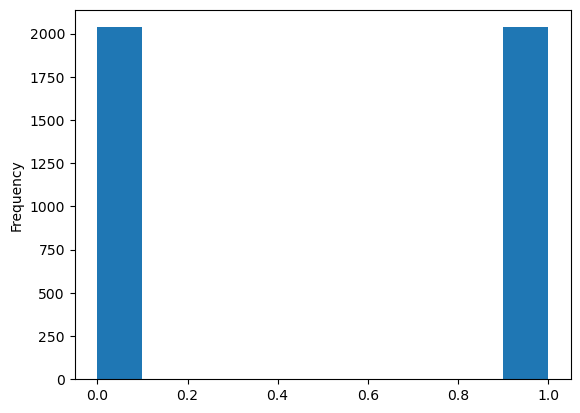

In [45]:
y_rus.plot(kind='hist')

### OverSampling 

In [16]:
from imblearn.over_sampling import RandomOverSampler

In [17]:
ros=RandomOverSampler(random_state=2529)

In [18]:
x_ros,y_ros=ros.fit_resample(x,y)

In [110]:
x_ros

,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Zero Balance
0,619,2,1,42,2,0.00,1,1,1,101348.88,0
1,608,0,1,41,1,83807.86,1,0,1,112542.58,1
2,502,2,1,42,8,159660.80,3,1,0,113931.57,1
3,699,2,1,39,1,0.00,2,0,0,93826.63,0
4,850,0,1,43,2,125510.82,1,1,1,79084.10,1
...,...,...,...,...,...,...,...,...,...,...,...
15921,511,2,1,46,1,0.00,1,1,1,115779.48,0
15922,586,1,1,36,5,103700.69,1,1,0,194072.56,1
15923,850,0,1,55,7,0.00,1,0,0,171762.87,0
15924,645,2,1,68,9,0.00,4,1,1,176353.87,0


In [111]:
y_ros

0        1
1        0
2        1
3        0
4        0
        ..
15921    1
15922    1
15923    1
15924    1
15925    1
Name: Churn, Length: 15926, dtype: int64

In [49]:
x_ros.shape,y_ros.shape,x.shape,y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [50]:
y_ros.value_counts()

1    7963
0    7963
Name: Churn, dtype: int64

In [51]:
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

<AxesSubplot:ylabel='Frequency'>

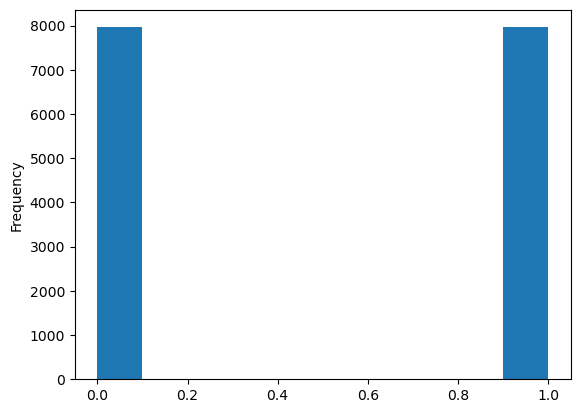

In [52]:
y_ros.plot(kind='hist')

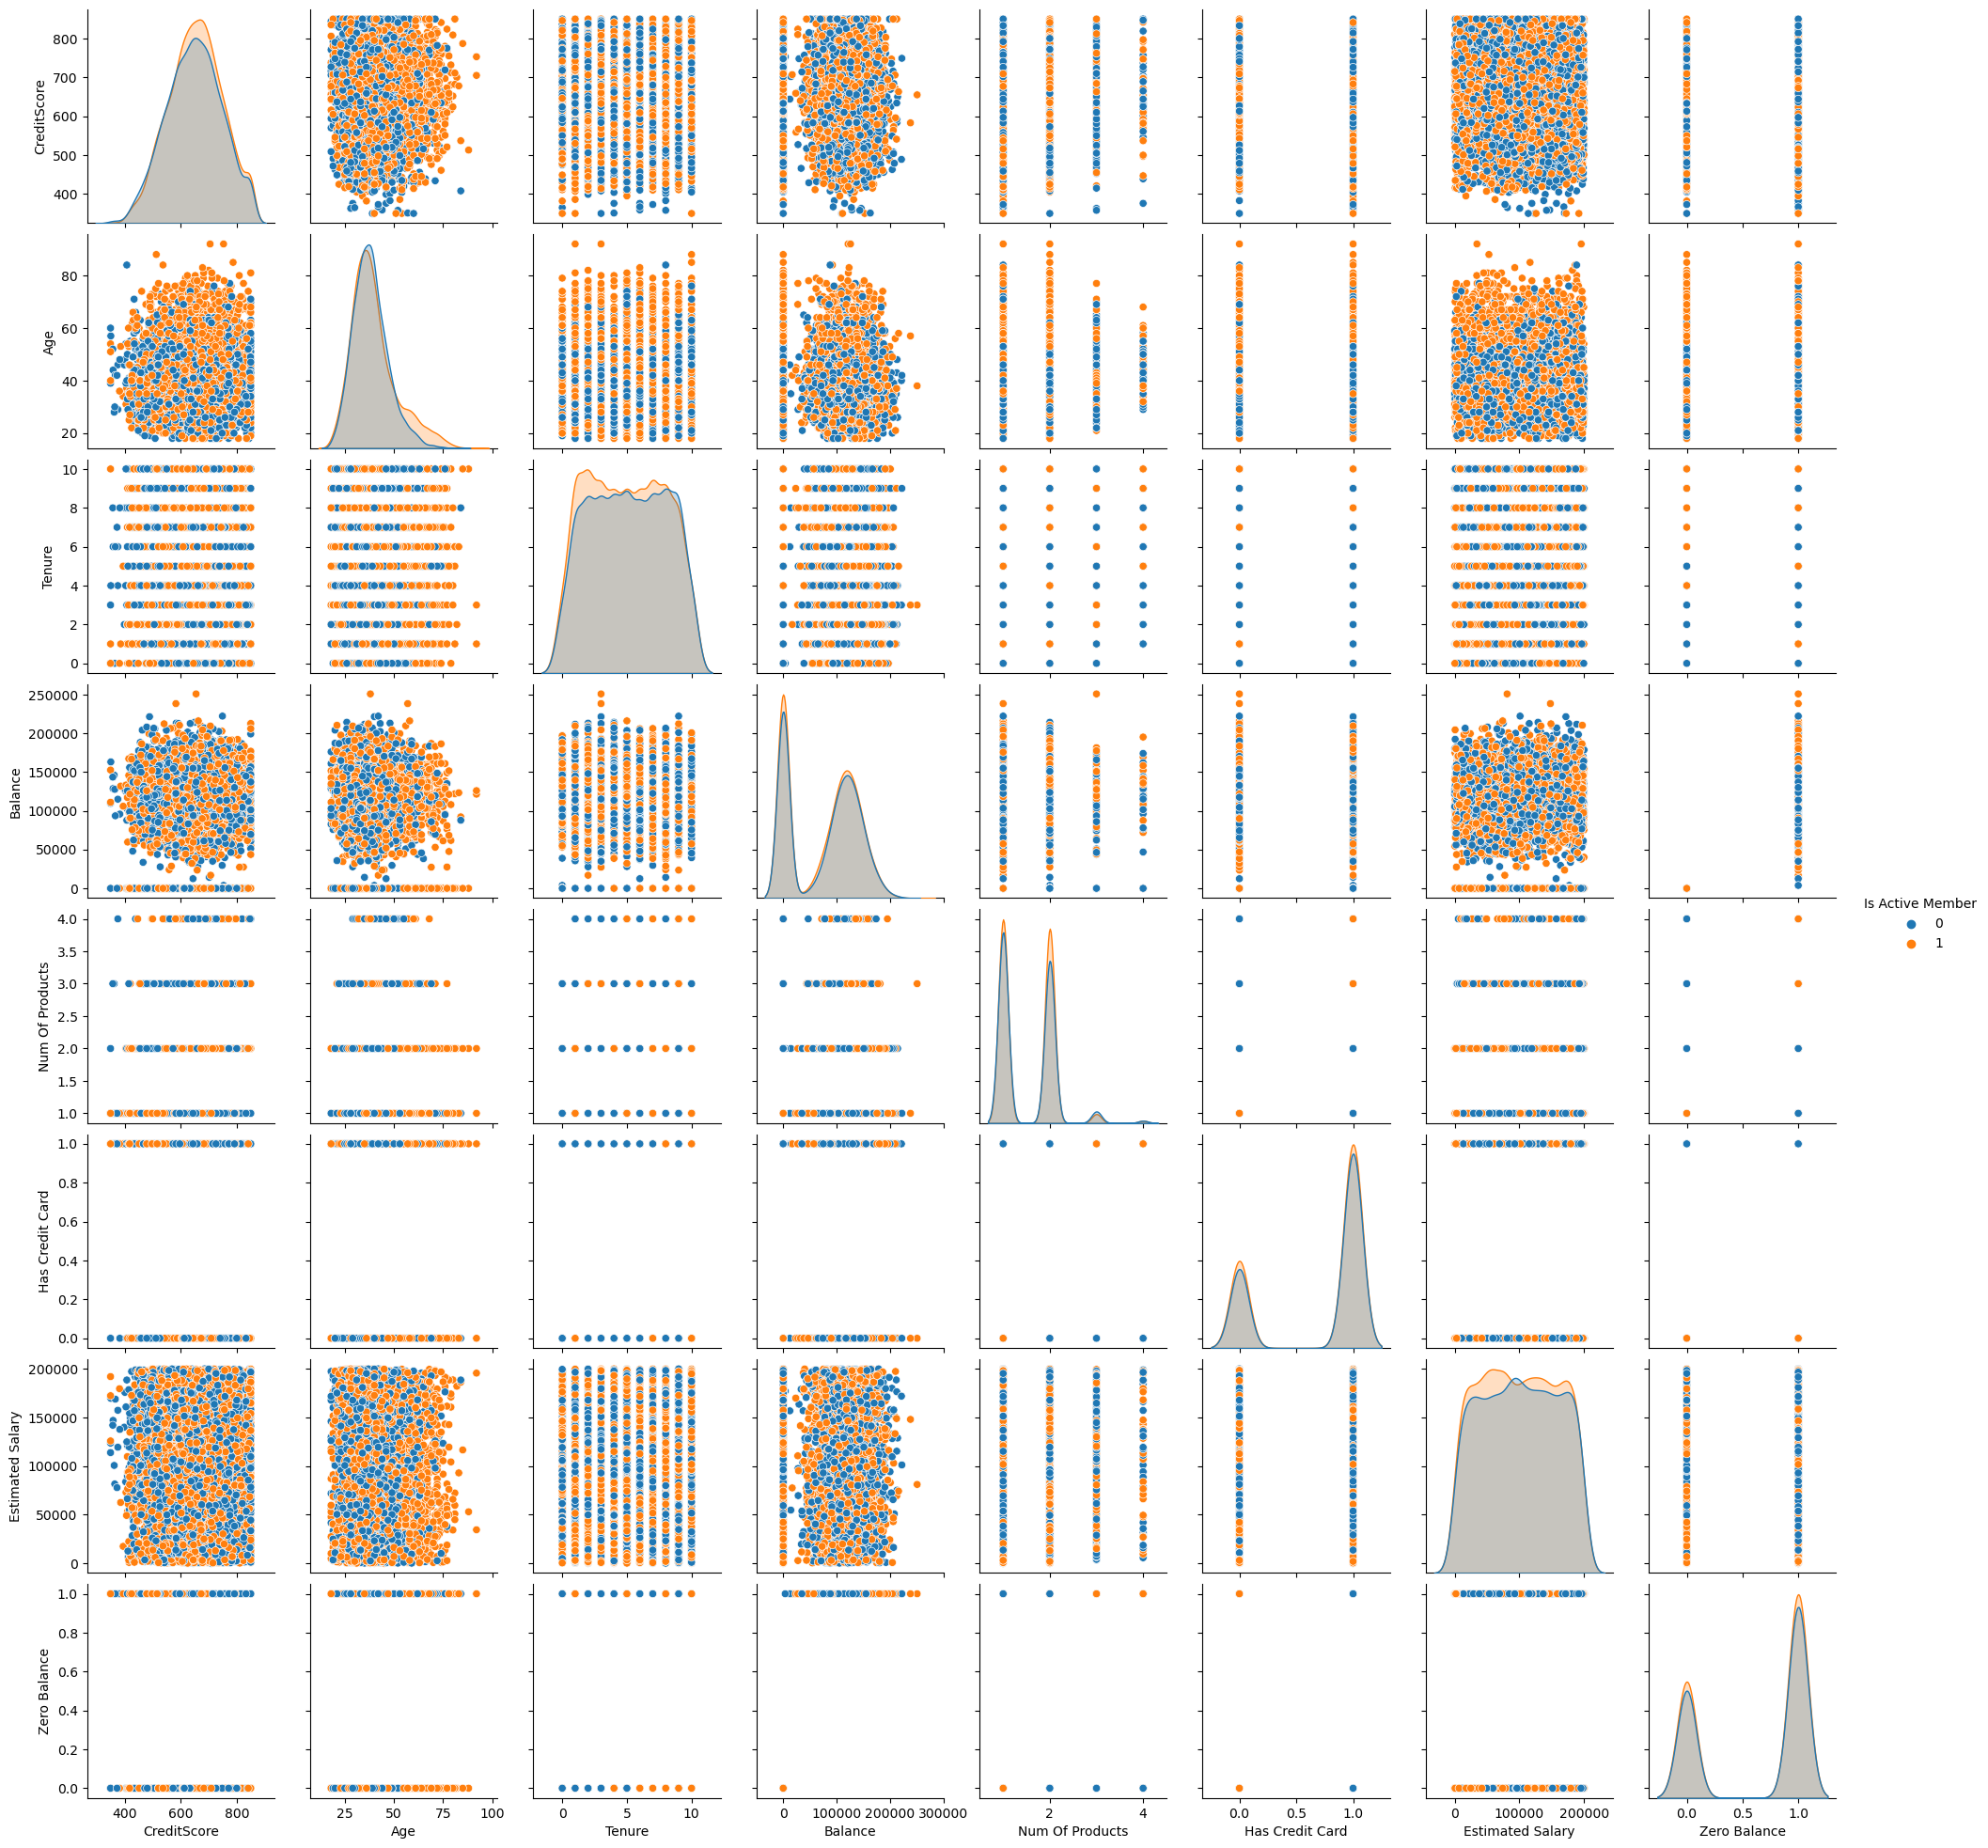

In [38]:
sns.pairplot(x,kind='scatter',hue='Is Active Member')

## Train Test Split 

In [19]:
from sklearn.model_selection import train_test_split

### Split Original Data 

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2529)

In [71]:
x_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Zero Balance
CustomerId,,,,,,,,,,,
15771139,578,1,0,34,8,147487.23,2,1,0,66680.77,1
15713463,645,1,1,41,2,138881.04,1,1,0,129936.53,1
15570417,579,2,0,35,1,0.00,2,1,0,4460.20,0
15626243,618,2,0,30,3,133844.22,1,1,1,31406.93,1
15809178,569,1,1,42,9,146100.75,1,1,0,32574.01,1
...,...,...,...,...,...,...,...,...,...,...,...
15723028,778,2,0,33,1,0.00,2,1,0,85439.73,0
15759284,750,2,1,37,6,0.00,1,1,1,117948.00,0
15796218,814,1,0,29,1,131968.57,2,1,1,147693.92,1


### Split Random Under Sampled data 

In [25]:
x_rus_train,x_rus_test,y_rus_train,y_rus_test=train_test_split(x_rus,y_rus,random_state=2529)

### Split Random Over Sampled Data 

In [26]:
x_ros_train,x_ros_test,y_ros_train,y_ros_test=train_test_split(x_ros,y_ros,random_state=2529)

## Standardize Features 

In [21]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [22]:
bcm.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

### Standardize Original Data

In [23]:
x_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(x_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']])
x_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(x_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

### Standardize Random Under Sample Data 

In [27]:
x_rus_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(x_rus_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']])
x_rus_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(x_rus_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

### Standardize Random Over Sample Data 

In [28]:
x_ros_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(x_ros_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']])
x_ros_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(x_ros_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

##  Model Selection
### 1. Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()

In [150]:
model1.intercept_

array([-1.52401565])

In [153]:
model1.coef_

array([[-0.05040203, -0.0574474 ,  0.53422308,  0.76075239, -0.06776887,
         0.18749653,  0.09143684, -0.07514974, -1.06527702, -0.01011416,
         0.31901622]])

### 2. Support Vector Machine Classifier 

#### For Raw Dataset

In [30]:
from sklearn.svm import SVC
svc=SVC()

#### For Random Under Sample Dataset

In [31]:
svc_rus=SVC()

#### For Random Over Sample Dataset 

In [32]:
svc_ros=SVC()

### 3. Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier()

## Modeling 

#### Raw Dataset modeling 
##### Logistic Regression

In [34]:
model1.fit(x_train,y_train)

LogisticRegression()

##### Support Vector Machine


In [35]:
svc.fit(x_train,y_train)

SVC()

#### Random Under Sampling Dataset modeling 

In [114]:
svc_rus.fit(x_rus_train,y_rus_train)

SVC()

#### Random Over Sampling Dataset modeling  

In [113]:
svc_ros.fit(x_ros_train,y_ros_train)

SVC()

##### Random Forest 

In [36]:
model2.fit(x_train,y_train)

RandomForestClassifier()

# Prediction

### From Raw Dataset
##### Logistic Regression Model

In [37]:
y_logreg_pred=model1.predict(x_test)

In [38]:
y_logreg_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

##### Support Vector Machine 

In [39]:
y_pred=svc.predict(x_test)

In [40]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### From Random Under Sampling Dataset 

In [117]:
y_rus_pred=svc_rus.predict(x_rus_test)

In [118]:
y_rus_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

### From Random Over Sampling Dataset

In [119]:
y_ros_pred=svc_ros.predict(x_ros_test)

In [120]:
y_ros_pred

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

##### Random Forest 

In [41]:
y_rf_pred=model2.predict(x_test)

In [42]:
y_rf_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Model Evaulation
Accuracy

In [43]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

### For Raw Dataset
##### Logistic Regression Model

In [44]:
accuracy=100*accuracy_score(y_test,y_logreg_pred)
print("The accuracy of the created Logistic Regression Model is",accuracy)

The accuracy of the created Logistic Regression Model is 80.46666666666667


In [45]:
confusion_matrix(y_test,y_logreg_pred)

array([[2414,    0],
       [ 586,    0]], dtype=int64)

In [166]:
print(classification_report(y_test,y_logreg_pred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.90      2414
           1       0.61      0.18      0.28       586

    accuracy                           0.82      3000
   macro avg       0.72      0.58      0.59      3000
weighted avg       0.79      0.82      0.77      3000



##### Support Vector Machine

In [46]:
svmaccuracy=100*accuracy_score(y_test,y_pred)
print("The accuracy of the created Support Vector Machine Model is",svmaccuracy)

The accuracy of the created Support Vector Machine Model is 80.46666666666667


In [122]:
confusion_matrix(y_test,y_pred)

array([[2380,   34],
       [ 410,  176]], dtype=int64)

In [123]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2414
           1       0.84      0.30      0.44       586

    accuracy                           0.85      3000
   macro avg       0.85      0.64      0.68      3000
weighted avg       0.85      0.85      0.82      3000



#### For Random Under Sampled Dataset 

In [124]:
confusion_matrix(y_rus_test,y_rus_pred)

array([[405, 118],
       [150, 346]], dtype=int64)

In [128]:
print(classification_report(y_rus_test,y_rus_pred))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75       523
           1       0.75      0.70      0.72       496

    accuracy                           0.74      1019
   macro avg       0.74      0.74      0.74      1019
weighted avg       0.74      0.74      0.74      1019



#### For Random Over Sampled Dataset 

In [125]:
confusion_matrix(y_ros_test,y_ros_pred)

array([[1608,  371],
       [ 496, 1507]], dtype=int64)

In [127]:
print(classification_report(y_ros_test,y_ros_pred))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79      1979
           1       0.80      0.75      0.78      2003

    accuracy                           0.78      3982
   macro avg       0.78      0.78      0.78      3982
weighted avg       0.78      0.78      0.78      3982



##### Random Forest  

In [58]:
rfaccuracy=100*accuracy_score(y_test,y_rf_pred)
print("The accuracy of the created Random Forest Model is",rfaccuracy)

The accuracy of the created Random Forest Model is 86.23333333333333


In [173]:
confusion_matrix(y_test,y_rf_pred)

array([[2336,   78],
       [ 332,  254]], dtype=int64)

In [174]:
print(classification_report(y_test,y_rf_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2414
           1       0.77      0.43      0.55       586

    accuracy                           0.86      3000
   macro avg       0.82      0.70      0.74      3000
weighted avg       0.85      0.86      0.85      3000



### Hyper Parameter Tuning
To see what to improvement are possible without treating imbalance

In [131]:
from sklearn.model_selection import GridSearchCV
param_grid={
    'C':[0.1,1,10],
    'gamma':[1,0.1,0.01],
    'kernel':['rbf'],
    'class_weight':['balanced']}

In [132]:
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)

#### For Raw DataSet 

In [133]:
grid.fit(x_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   6.2s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   6.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   4.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   5.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   5.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   5.5s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.6s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.8s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   4.3s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

#### For Random Under Sampled Dataset 

In [134]:
grid.fit(x_rus_train,y_rus_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.0s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.9s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.1s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.1s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.7s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.7s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

#### For Random Over Sampled Dataset

In [135]:
grid.fit(x_ros_train,y_ros_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=  17.4s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=  17.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=  13.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=  12.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=  14.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=  14.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=  14.0s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=  14.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=  10.8s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=  10.5s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=  12.5s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [138]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


Grid Prediction

For Raw Dataset

In [139]:
y_grid_pred=grid.predict(x_test)

For Random Under Sampled Dataset

In [140]:
y_rus_grid_pred=grid.predict(x_rus_test)

For Random Over Sampled Dataset

In [141]:
y_ros_grid_pred=grid.predict(x_ros_test)

Accuracy for Grid Prediction

For Raw Dataset

In [142]:
confusion_matrix(y_test,y_grid_pred)

array([[2264,  150],
       [  16,  570]], dtype=int64)

In [143]:
print(classification_report(y_test,y_grid_pred))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96      2414
           1       0.79      0.97      0.87       586

    accuracy                           0.94      3000
   macro avg       0.89      0.96      0.92      3000
weighted avg       0.95      0.94      0.95      3000



For Random Under Sampled Dataset

In [144]:
confusion_matrix(y_rus_test,y_rus_grid_pred)

array([[505,  18],
       [  4, 492]], dtype=int64)

In [145]:
print(classification_report(y_rus_test,y_rus_grid_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       523
           1       0.96      0.99      0.98       496

    accuracy                           0.98      1019
   macro avg       0.98      0.98      0.98      1019
weighted avg       0.98      0.98      0.98      1019



For Random Over Sampled Dataset

In [146]:
confusion_matrix(y_ros_test,y_ros_grid_pred)

array([[1733,  246],
       [  48, 1955]], dtype=int64)

In [147]:
print(classification_report(y_ros_test,y_ros_grid_pred))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      1979
           1       0.89      0.98      0.93      2003

    accuracy                           0.93      3982
   macro avg       0.93      0.93      0.93      3982
weighted avg       0.93      0.93      0.93      3982



In [59]:
results=pd.DataFrame({'Model':['LogisticRegression','Support Vector Machine','Random Forest'],
                    'Accuracy Score':[accuracy,svmaccuracy,rfaccuracy]})
result_df=results.sort_values(by='Accuracy Score', ascending=False)
result_df=result_df.set_index('Model')
result_df

,Accuracy Score
Model,
Random Forest,86.233333
LogisticRegression,80.466667
Support Vector Machine,80.466667


## Explaination
In conclusion, after creating three model for predicting the bank customer who might churn bank in future, we understood that Random Over Sampling Grid Prediction in Support Vector Machine Model has the highest accuracy in prediction of customer that will churn the bank in future (recall=0.98).